# Modelo de Regresión Logística

In [20]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [21]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,1,0,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,1,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,1,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,1,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,...,1,0,1,0,0,0,0,0,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1,...,0,1,0,0,0,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1,...,0,1,0,0,0,0,0,0,1,0
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,0,...,0,1,0,0,0,0,1,0,0,0


In [22]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Earth', 'Europa',
       'Mars', 'Cabin_num', 'Cabin_Side_P', 'Cabin_Side_S', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T']]

In [23]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 22)	y_train: (6085,)
X_test: (2608, 22)	y_test: (2608,)


In [24]:
# Creamos el modelo y lo entrenamos

model = LogisticRegression(max_iter = 83, solver='newton-cg',random_state=42,  multi_class='auto', C=1.5)
model.fit(X_train, y_train)

LogisticRegression(C=1.5, max_iter=83, random_state=42, solver='newton-cg')

In [25]:
print(model.classes_)
print(model.coef_)

[False  True]
[[ 1.42520368e+00 -6.52105712e-03 -3.80206415e-01 -1.47097963e-03
   5.17814821e-04  5.99956825e-04 -2.01170386e-03 -1.89489427e-03
  -6.26587546e-01  7.64849842e-01 -1.38262296e-01  2.18833568e-04
  -3.17366869e-01  3.17366869e-01 -4.01607906e-01  7.71503471e-01
   1.71969964e+00 -4.64871736e-02 -6.97319378e-01 -3.13752502e-01
  -6.73477190e-01 -3.58558965e-01]]


In [26]:
#como ya tenemos el modelo entrenado, lo usamos sobre los datos del test para hacer la prediccion

y_hat1=model.predict(X_train)
y_hat2=model.predict(X_test)

print('MODELO REGRESION LOGÍSTICA')
print("ACCURACY TRAIN:", accuracy_score(y_train, y_hat1))
print("ACCURACY TEST:", accuracy_score(y_test, y_hat2))

MODELO REGRESION LOGÍSTICA
ACCURACY TRAIN: 0.7972062448644207
ACCURACY TEST: 0.7818251533742331


In [27]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=15) #Parte los datos en 15 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[0.7955665  0.7955665  0.7955665  0.78571429 0.7955665  0.77093596
 0.81773399 0.77586207 0.78817734 0.81527094 0.77777778 0.77530864
 0.80987654 0.85185185 0.79506173]
Logistic Regression: 0.796389 (0.020192)


## Visualizamos los datos

In [28]:
# Matriz de confusion del mejor modelo

import sklearn.metrics as metrics
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 958  331]
 [ 238 1081]]


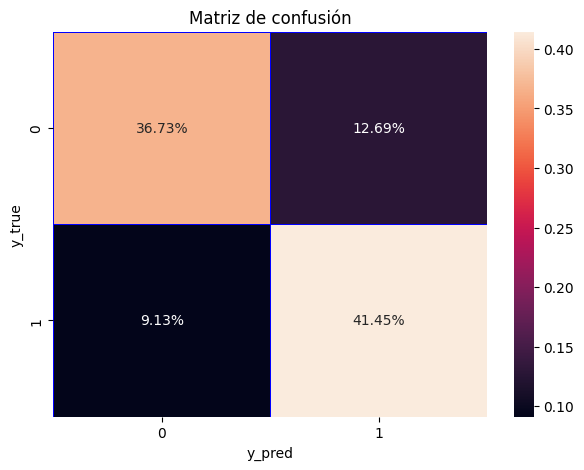

In [29]:
f, ax=plt.subplots(figsize=(7,5))
sns.heatmap(cm/np.sum(cm), annot=True, linewidths=0.5, fmt='.2%', linecolor="blue")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Matriz de confusión")
plt.show()

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


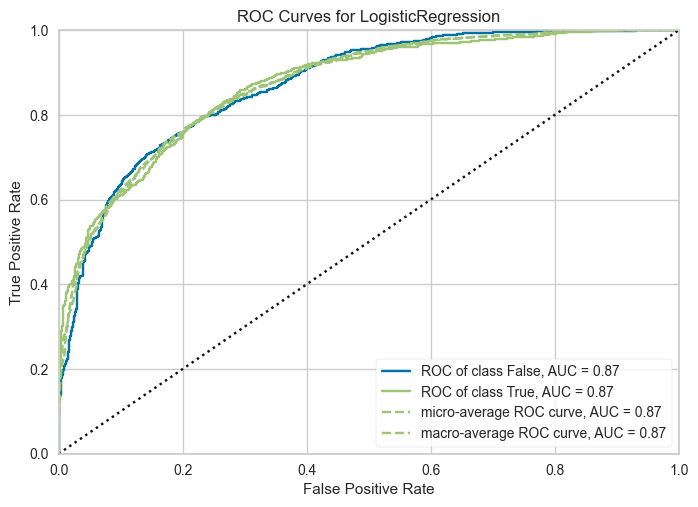

In [30]:
# from yellowbrick.classifier import ROCAUC

# visualizer = ROCAUC(model)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_test, y_test)
# visualizer.show();

## Cargamos el CSV Test de Kaggle para pasarle el modelo y guardarlo en un nuevo CSV para enviarlo como submissions

In [31]:
# Cargamos el dataframe con el CSV original sin feature ingeniering...

train = pd.read_csv('../data/Raw/train.csv', sep=',')
df_trainRaw=pd.DataFrame(train)
df_trainRaw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [32]:
# sns.jointplot(x=df_trainRaw["Spa"], y=df_train.Spa)

## Cargamos los datos de entrada del archivo .csv Test

In [33]:
# Load data
test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,Europa,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,0,...,0,1,0,0,0,0,0,0,1,0
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,1,...,1,0,0,0,0,1,0,0,0,0


## Hacemos la prediccion

In [34]:
testID = pd.read_csv('../data/Raw/test.csv', sep=',')

In [35]:
prediccion_test = pd.DataFrame(model.predict(df_test))
prediccion_test['PassengerId'] =testID['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/Regresion_Logistica.csv', index=False)
prediccion_test

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
